<a href="https://colab.research.google.com/github/PankajRaghunadhabhatla/Python/blob/main/Copy_of_Linear_Regression_test_Intelipaat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df = pd.read_csv('data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [69]:
#How many employees having more than 5 years experience are earning more than 60000?
filtered_data = df[(df['YearsExperience'] > 5) & (df['Salary'] >60000)]
count_of_employees = filtered_data.shape[0]
count_of_employees

14

In [70]:
#. How many employees are earning between 50000-80000?
filter_earning = df[(df['Salary']>=50000) & (df['Salary']<= 80000)]
count_earning = filter_earning.shape[0]
count_earning

12

In [71]:
df.shape

(30, 2)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [73]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


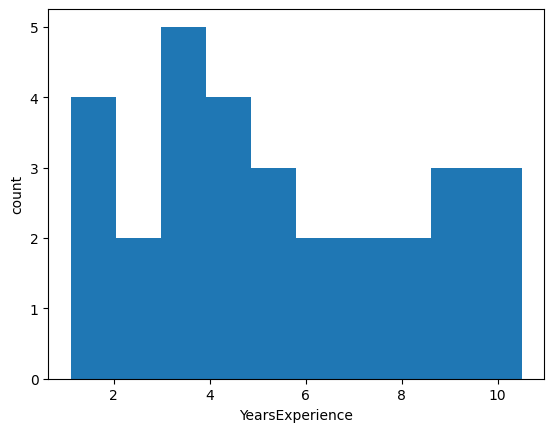

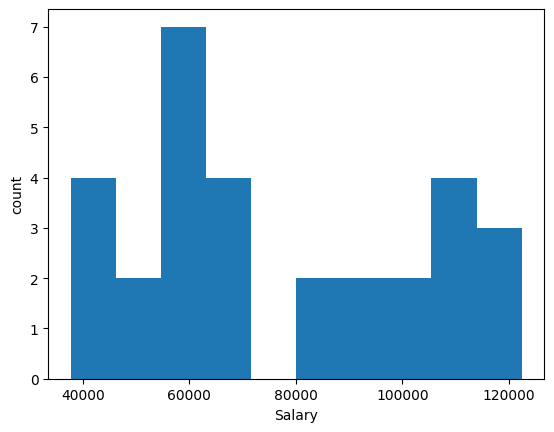

In [74]:
#Check distribution
for i in df.columns:
  plt.hist(df[i])
  plt.xlabel(i)
  plt.ylabel('count')
  plt.show()

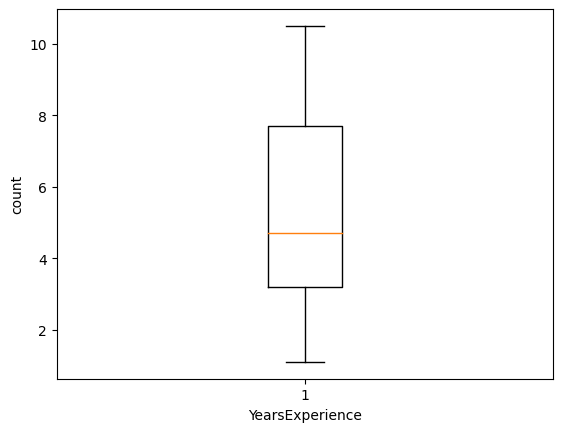

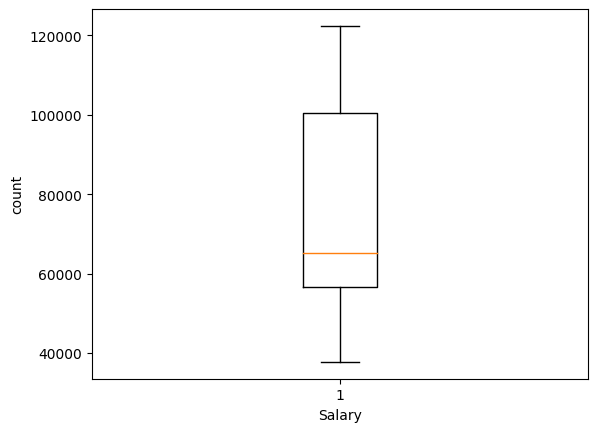

In [75]:
# check outliers
for i in df.columns:
  plt.boxplot(df[i])
  plt.xlabel(i)
  plt.ylabel('count')
  plt.show()

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [77]:
x = df[['YearsExperience']]
y = df['Salary']


In [78]:
x_train, x_test, y_train,y_test = train_test_split(x,y, train_size = 0.6, random_state=1 )

In [79]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(18, 1)
(12, 1)
(18,)
(12,)


In [80]:
x_train,y_train,x_test,y_test

(    YearsExperience
 2               1.5
 25              9.0
 6               3.0
 18              5.9
 13              4.1
 7               3.2
 27              9.6
 1               1.3
 16              5.1
 0               1.1
 15              4.9
 29             10.5
 28             10.3
 9               3.7
 8               3.2
 12              4.0
 11              4.0
 5               2.9,
 2      37731.0
 25    105582.0
 6      60150.0
 18     81363.0
 13     57081.0
 7      54445.0
 27    112635.0
 1      46205.0
 16     66029.0
 0      39343.0
 15     67938.0
 29    121872.0
 28    122391.0
 9      57189.0
 8      64445.0
 12     56957.0
 11     55794.0
 5      56642.0
 Name: Salary, dtype: float64,
     YearsExperience
 17              5.3
 21              7.1
 10              3.9
 19              6.0
 14              4.5
 20              6.8
 26              9.5
 3               2.0
 24              8.7
 22              7.9
 23              8.2
 4               2.2,
 17    

In [81]:
#Build Regression Model
l_model = LinearRegression()
l_model

LinearRegression()

In [82]:
l_model.fit(x_train,y_train)

LinearRegression()

In [83]:
prediction = l_model.predict(x_test)
prediction

array([ 74161.91026747,  89966.88467069,  61869.1523983 ,  80308.28920206,
        67137.47719937,  87332.72227016, 111040.18387499,  45186.12386157,
       104015.75080689,  96991.31773879,  99625.48013933,  46942.23212859])

In [84]:
error_pred = pd.DataFrame(columns = ('Actual_data', 'Prediction_data'))
error_pred

,Actual_data,Prediction_data


In [85]:
error_pred['Actual_data']= y_test
error_pred

,Actual_data,Prediction_data
17,83088.0,NaN
21,98273.0,NaN
10,63218.0,NaN
19,93940.0,NaN
14,61111.0,NaN
20,91738.0,NaN
26,116969.0,NaN
3,43525.0,NaN
24,109431.0,NaN
22,101302.0,NaN


In [86]:
error_pred['Prediction_data'] = prediction

In [87]:
error_pred

,Actual_data,Prediction_data
17,83088.0,74161.910267
21,98273.0,89966.884671
10,63218.0,61869.152398
19,93940.0,80308.289202
14,61111.0,67137.477199
20,91738.0,87332.722270
26,116969.0,111040.183875
3,43525.0,45186.123862
24,109431.0,104015.750807
22,101302.0,96991.317739


In [88]:
error_pred['Error'] = error_pred['Actual_data'] - error_pred['Prediction_data']
error_pred

,Actual_data,Prediction_data,Error
17,83088.0,74161.910267,8926.089733
21,98273.0,89966.884671,8306.115329
10,63218.0,61869.152398,1348.847602
19,93940.0,80308.289202,13631.710798
14,61111.0,67137.477199,-6026.477199
20,91738.0,87332.722270,4405.277730
26,116969.0,111040.183875,5928.816125
3,43525.0,45186.123862,-1661.123862
24,109431.0,104015.750807,5415.249193
22,101302.0,96991.317739,4310.682261


In [89]:
# Check Accuracy
from sklearn.metrics import *

In [90]:
r2_on_test_data = r2_score(y_test,prediction)
r2_on_test_data

0.906786576108805

60:40 Train test split

In [91]:
x_train, x_test, y_train,y_test = train_test_split(x,y, train_size = 0.6, random_state=1 )

In [92]:
#Build Model_60:40
l_model_1 = LinearRegression()
l_model_1

LinearRegression()

In [93]:
l_model_1.fit(x_train,y_train)

LinearRegression()

In [94]:
prediction_1 = l_model_1.predict(x_test)
prediction_1

array([ 74161.91026747,  89966.88467069,  61869.1523983 ,  80308.28920206,
        67137.47719937,  87332.72227016, 111040.18387499,  45186.12386157,
       104015.75080689,  96991.31773879,  99625.48013933,  46942.23212859])

In [95]:
ep = pd.DataFrame(columns = ('ad','pd'))
ep

,ad,pd


In [96]:
ep['ad']=y_test
ep

,ad,pd
17,83088.0,NaN
21,98273.0,NaN
10,63218.0,NaN
19,93940.0,NaN
14,61111.0,NaN
20,91738.0,NaN
26,116969.0,NaN
3,43525.0,NaN
24,109431.0,NaN
22,101302.0,NaN


In [97]:
ep['pd']=prediction_1
ep

,ad,pd
17,83088.0,74161.910267
21,98273.0,89966.884671
10,63218.0,61869.152398
19,93940.0,80308.289202
14,61111.0,67137.477199
20,91738.0,87332.722270
26,116969.0,111040.183875
3,43525.0,45186.123862
24,109431.0,104015.750807
22,101302.0,96991.317739


In [98]:
ep['er'] = ep['ad']-ep['pd']
ep

,ad,pd,er
17,83088.0,74161.910267,8926.089733
21,98273.0,89966.884671,8306.115329
10,63218.0,61869.152398,1348.847602
19,93940.0,80308.289202,13631.710798
14,61111.0,67137.477199,-6026.477199
20,91738.0,87332.722270,4405.277730
26,116969.0,111040.183875,5928.816125
3,43525.0,45186.123862,-1661.123862
24,109431.0,104015.750807,5415.249193
22,101302.0,96991.317739,4310.682261


In [99]:
r2_sq = r2_score(y_test,prediction_1)
r2_sq

0.906786576108805

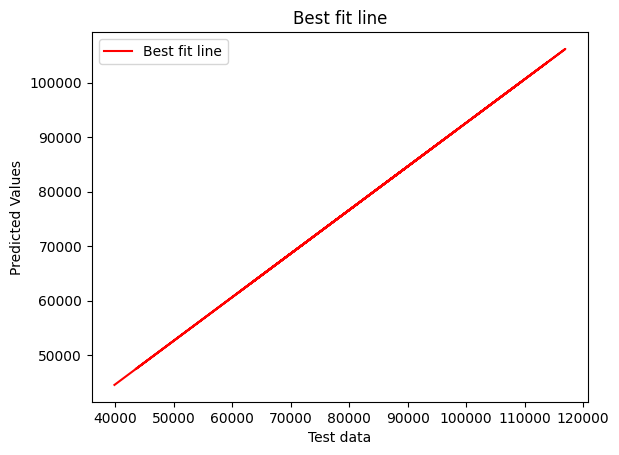

In [104]:
# Best fit line
m,b = np.polyfit(y_test,prediction,1)
m,b
plt.plot(y_test,m*y_test + b, color='red', label = "Best fit line")
plt.xlabel('Test data')
plt.ylabel('Predicted Values')
plt.title('Best fit line')
plt.legend()
plt.show()